<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
df_raw=pd.read_csv("/content/drive/MyDrive/Hackathon/Participants_Data_THL/train.csv")

In [78]:
df_raw.shape

(42748, 14)

In [ ]:
df_raw.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [37]:
df_raw.isna().sum()

edible-poisonous           0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         6940
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1719
habitat                    0
season                     0
dtype: int64

In [80]:
df_raw['gill-attachment'].fillna(df_raw['gill-attachment'].mode()[0], inplace=True)

In [81]:
df_raw['gill-attachment'].isna().sum()

0

In [79]:
df_raw['ring-type'].fillna(df_raw['ring-type'].mode()[0], inplace =True)

In [82]:
df_raw['ring-type'].isna().sum()

0

In [83]:
df_raw.isna().sum()

edible-poisonous        0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [ ]:
df['gill-attachment'].nunique()

7

In [ ]:
df['gill-attachment'].isna().sum()

6940

In [ ]:
df.dropna(subset=['gill-attachment'],inplace=True)

In [ ]:
df['gill-attachment'].isna().sum()

0

In [ ]:
df.dropna(subset=['ring-type'],inplace=True)

In [ ]:
df.shape

(42748, 14)

In [ ]:
df.corr()

,cap-diameter,stem-height,stem-width
cap-diameter,1.000000,0.424985,0.696979
stem-height,0.424985,1.000000,0.435270
stem-width,0.696979,0.435270,1.000000


In [84]:
import numpy as np

In [85]:
import matplotlib.pyplot as plt

In [86]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

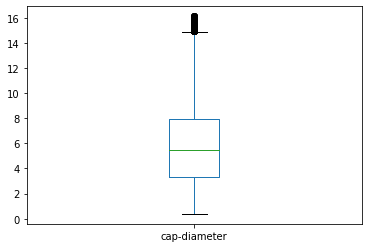

In [91]:
plot_boxplot(df_new, 'cap-diameter')

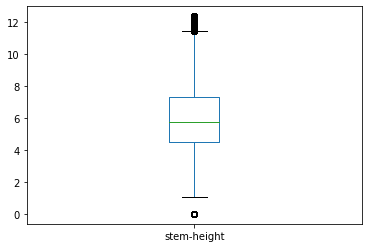

In [92]:
plot_boxplot(df_new, 'stem-height')

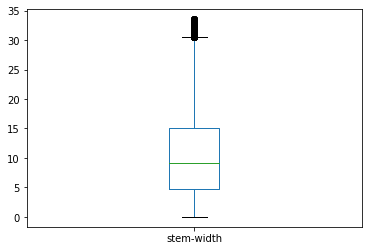

In [90]:
plot_boxplot(df_new, 'stem-width')

In [97]:
def outliers(df,ft):
    Q1=df['ft'].quantile(0.25)
    Q3=df['ft'].quantile(0.75)
    IQR=Q3-Q1
    LW = Q1-(1.5*IQR)
    UW = Q3+(1.5*IQR)
    ls = df.index[(df[ft] < LW)| (df[ft] > UW)]
    return ls

In [1]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [43]:
df_raw.shape

(42748, 14)

In [89]:
cols = ['cap-diameter', 'stem-height','stem-width'] # one or more

Q1 = df_raw[cols].quantile(0.25)
Q3 = df_raw[cols].quantile(0.75)
IQR = Q3 - Q1

df_new = df_raw[~((df_raw[cols] < (Q1 - 1.5 * IQR)) |(df_raw[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [94]:
df_new.shape

(39011, 14)

In [95]:
df_new.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
LE = LabelEncoder()

In [98]:
df_new['edible-poisonous'] = LE.fit_transform(df_new['edible-poisonous'])
df_new['cap-shape'] = LE.fit_transform(df_new['cap-shape'])
df_new['cap-color'] = LE.fit_transform(df_new['cap-color'])
df_new['does-bruise-or-bleed'] = LE.fit_transform(df_new['does-bruise-or-bleed'])
df_new['gill-attachment'] = LE.fit_transform(df_new['gill-attachment'])
df_new['gill-color'] = LE.fit_transform(df_new['gill-color'])
df_new['stem-color'] = LE.fit_transform(df_new['stem-color'])
df_new['has-ring'] = LE.fit_transform(df_new['has-ring'])
df_new['ring-type'] = LE.fit_transform(df_new['ring-type'])
df_new['habitat'] = LE.fit_transform(df_new['habitat'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [99]:
df_new.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,5.75,6,5,1,5,10,6.13,14.93,11,0,1,0,a
1,1,2.27,3,2,0,3,2,0.00,0.00,2,0,1,0,s
2,1,5.59,1,11,1,6,7,5.47,11.27,11,0,1,0,a
3,1,0.74,6,7,0,0,5,4.33,0.98,4,0,1,0,a
4,1,9.60,6,5,0,0,10,10.84,28.52,11,0,1,0,u


In [100]:
y= pd.factorize(df_new['season'])

In [52]:
print(df_new['season'].head(20))

0     a
1     s
2     a
3     a
4     u
5     a
6     u
7     u
8     u
9     a
10    a
11    u
12    u
13    u
14    a
15    u
16    a
17    u
18    u
19    a
Name: season, dtype: object


In [ ]:
print(definitions)

a


In [101]:
x = df_new.iloc[:,0:13]

In [102]:
y=df_new['season']

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=40,stratify=y)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
log_reg = LogisticRegression()

In [108]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [109]:
y_pred_log = log_reg.predict(x_test)

In [110]:
y_pred_log

array(['a', 'a', 'a', ..., 'a', 'a', 'a'], dtype=object)

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [112]:
acc_score_log = accuracy_score(y_test,y_pred_log).round(3)

In [113]:
acc_score_log

0.505

In [114]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [115]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
y_pred_dt = DT.predict(x_test)

In [117]:
y_pred_dt

array(['a', 'u', 'w', ..., 'u', 'w', 'u'], dtype=object)

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [119]:
acc_score_dt = accuracy_score(y_test,y_pred_dt).round(3)

In [120]:
acc_score_dt

0.52